In [134]:

import sys
sys.path
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan')
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/OASIS-master')

import warnings
warnings.filterwarnings('ignore')

from numpy import matlib as ml
import pickle
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pyute as ut
import sklearn.discriminant_analysis as skd
import size_contrast_analysis as sca
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D





In [2]:
    def compute_tuning(dsfile):
        with h5py.File(dsfile,mode='r') as f:
            keylist = [key for key in f.keys()]
            tuning = [None]*len(keylist)
            uparam = [None]*len(keylist)
            displacement = [None]*len(keylist)
            for ikey in range(len(keylist)):
#             try:
                session = f[keylist[ikey]]
                print(session)
                print([key for key in session.keys()])
                if 'size_contrast_0' in session:
                    sc0 = session['size_contrast_0']
                    data = sc0['decon'][:]
                    stim_id = sc0['stimulus_id'][:]
                    nbefore = sc0['nbefore'][()]
                    nafter = sc0['nafter'][()]
                    trialrun = sc0['running_speed_cm_s'][:,nbefore:-nafter].mean(-1)>10 #
                    print(sc0['running_speed_cm_s'].shape)
                    print(np.nanmean(trialrun))
                    if np.nanmean(trialrun)>0.4:
                        tuning[ikey] = ut.compute_tuning(data,stim_id,trial_criteria=trialrun)[:]
                    for param in sc0['stimulus_parameters']:
                        uparam[ikey] = sc0[param][:]
                    if 'rf_displacement_deg' in sc0:
                        displacement[ikey] = sc0['rf_displacement_deg'][:]
                    elif 'rf_ctr' in sc0:
                        displacement[ikey] = sc0['rf_ctr'][:]
    #             except:
    #                 print('could not do '+keylist[ikey])
        return tuning,uparam,displacement

In [138]:
ds_l4 = '/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/Lists_from_raw--expttype=size_contrast_0-datafield=decon-running_pct_cutoff=0.1-running_speed_threshold=10-pyr_l4.pkl'
ds_l23 = '/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/Lists_from_raw--expttype=size_contrast_0-datafield=decon-running_pct_cutoff=0.1-running_speed_threshold=10-pyr_l23.pkl'


with open(ds_l4, 'rb') as handle_loadModel:
    raw_l4=pickle.load(handle_loadModel)
    
with open(ds_l23, 'rb') as handle_loadModel:
    raw_l23=pickle.load(handle_loadModel)

# this_data: N x size x contrast x angle, this is a single session matrix
# if bigger than that we also have trials, we average first

In [139]:
raw_l4.keys()

dict_keys(['cell_type', 'usize', 'ucontrast', 'tunings_decon', 'uparams_decon', 'displacements', 'pvals', 'ret_info'])

In [148]:
tuning_l23=raw_l23['tunings_decon'][0][0]
tuning_l4=raw_l4['tunings_decon'][0][0]
ucontrast=raw_l4['ucontrast']
usize=raw_l4['usize']


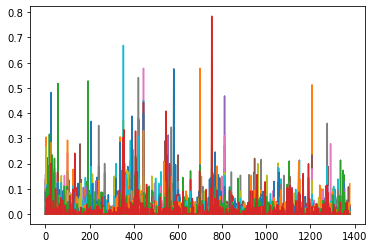

In [142]:
plt.plot(tuning_4[4][:,0,0,0,:]);

In [143]:
usize

array([ 5,  8, 13, 22, 36, 60])

In [144]:
data = np.nanmean(np.nanmean(this_sess_tuning[:,:5,[0,-5,-4,-3,-2,-1],:,8:-8],-1),-1)
data.shape

(2235, 5, 6)

In [145]:

def plot_SMI(tunings):
    for k in range(1,len(tunings)):
        this_sess_tuning = tunings[k]
        data = np.nanmean(np.nanmean(this_sess_tuning[:,:6,[0,-5,-4,-3,-2,-1],:,8:-8],-1),-1)
        data=data/np.nanmean(data)
        evoked_60=(data[:,-1,:]-ml.repmat(data[:,0,0],6,1).T)
        evoked_max=(np.max(data[:,:,:],1)-ml.repmat(data[:,0,0],6,1).T)
        #plt.plot(this_data_class.usize,np.nanmean(data[:,:,-1],0))
        #plt.plot(this_data_class.ucontrast,np.nanmean(evoked_60/evoked_max,0))
        plt.plot(np.nanmean(evoked_60,0)/np.nanmean(evoked_max,0))

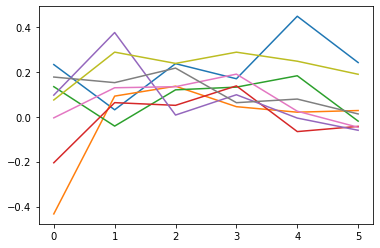

In [149]:
plot_SMI(tuning_l4)

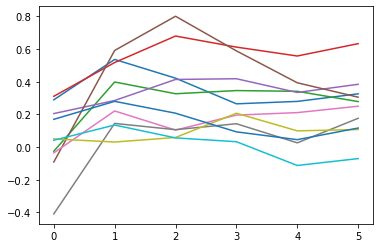

In [150]:
plot_SMI(tuning_l23)